In [1]:
import warnings
warnings.filterwarnings('ignore');

In [47]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
data.shape

(381109, 12)

In [6]:
data.describe().style.background_gradient(cmap = "Blues")

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
data.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

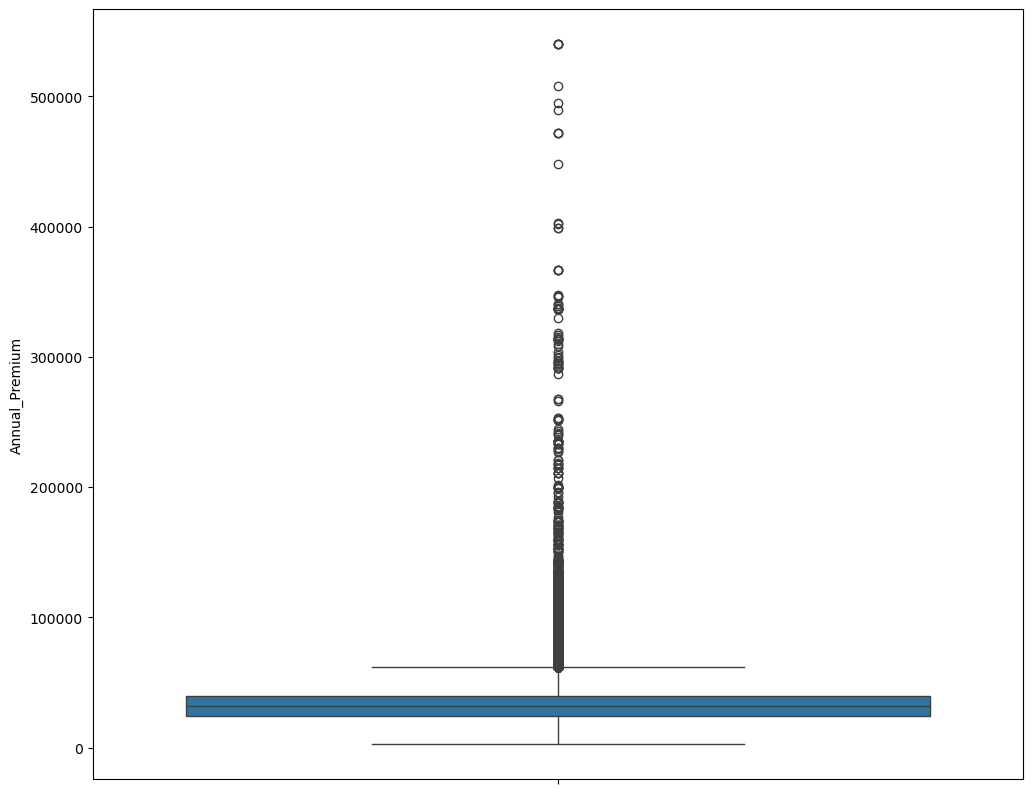

In [10]:
plt.rcParams['figure.figsize']=(12,10)
sns.boxplot(data['Annual_Premium'])
plt.show()

In [11]:
print("beforeremoving outliers:", data.shape)
data = data[data['Annual_Premium'] < 150000]
print("after removing outliers:", data.shape)

beforeremoving outliers: (381109, 12)
after removing outliers: (380918, 12)


In [12]:
data['Response'].value_counts()

Response
0    334241
1     46677
Name: count, dtype: int64

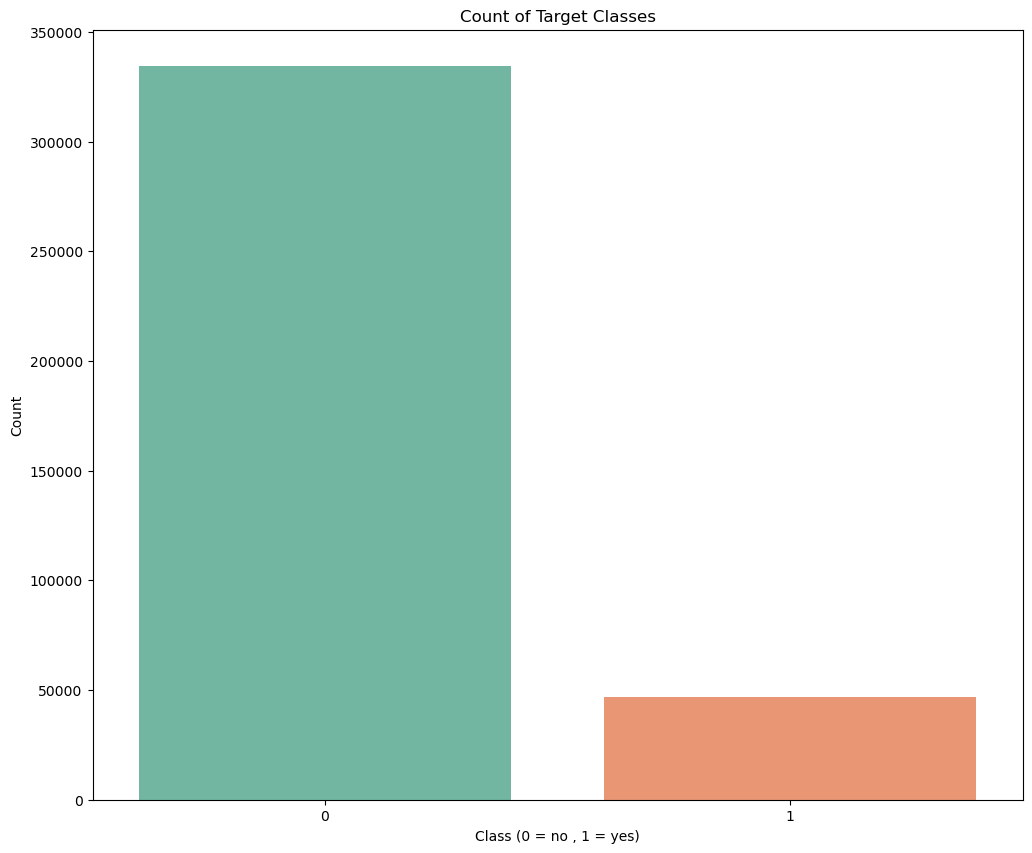

In [13]:
sns.countplot(x='Response', data=data, hue='Response', palette='Set2', legend=False)
plt.title("Count of Target Classes")
plt.xlabel("Class (0 = no , 1 = yes)")
plt.ylabel("Count")
plt.show()

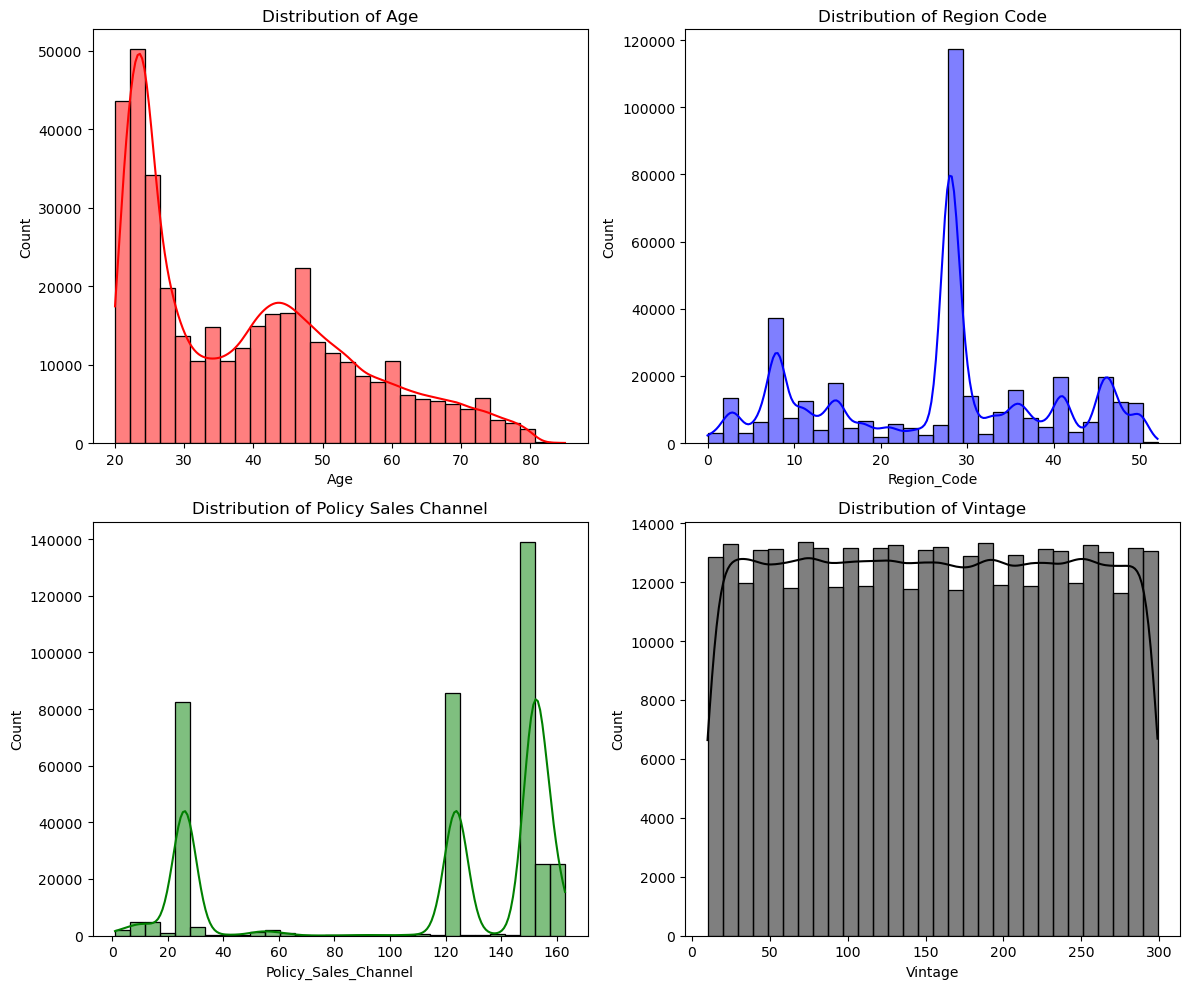

In [14]:
plt.figure(figsize=(12, 10))

# Subplot 1: Age Distribution
plt.subplot(221)
sns.histplot(data['Age'], color='red', kde=True, bins=30)
plt.title('Distribution of Age')

# Subplot 2: Region Code Distribution
plt.subplot(222)
sns.histplot(data['Region_Code'], color='blue', kde=True, bins=30)
plt.title('Distribution of Region Code')

# Subplot 3: Policy Sales Channel Distribution
plt.subplot(223)
sns.histplot(data['Policy_Sales_Channel'], color='green', kde=True, bins=30)
plt.title('Distribution of Policy Sales Channel')

# Subplot 4: Vintage Distribution
plt.subplot(224)
sns.histplot(data['Vintage'], color='black', kde=True, bins=30)
plt.title('Distribution of Vintage')

# Show plot
plt.tight_layout()
plt.show()

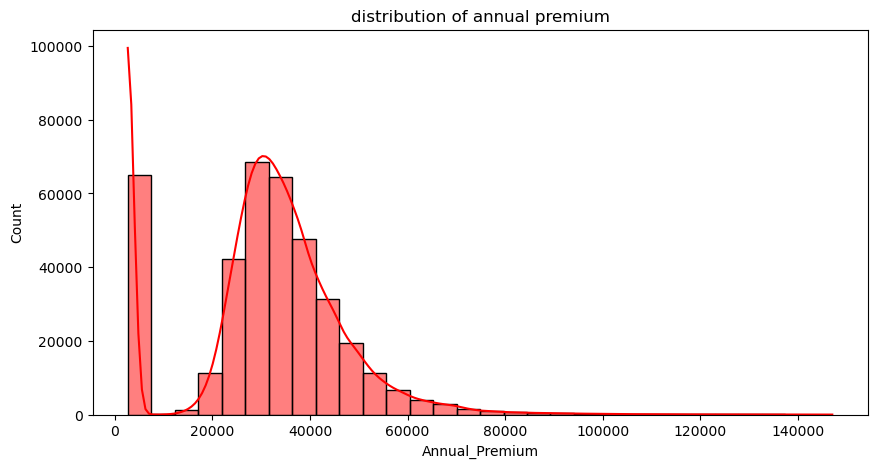

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data['Annual_Premium'], color= 'red',kde=True, bins = 30)
plt.title('distribution of annual premium')
plt.show()

In [16]:
data['Annual_Premium'] = np.log(data['Annual_Premium'])

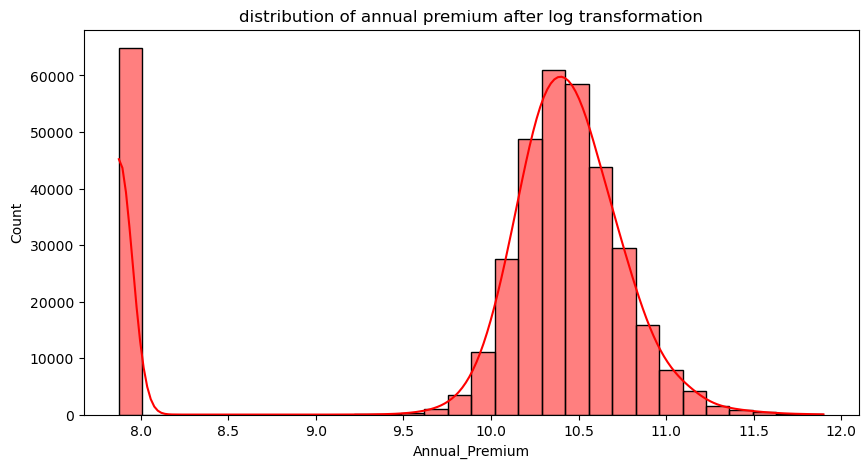

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data['Annual_Premium'], color= 'red',kde=True, bins = 30)
plt.title('distribution of annual premium after log transformation')
plt.show()

In [18]:
data['Gender'].value_counts()

Gender
Male      205996
Female    174922
Name: count, dtype: int64

In [19]:
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200197
< 1 Year     164726
> 2 Years     15995
Name: count, dtype: int64

In [20]:
data['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192304
No     188614
Name: count, dtype: int64

In [21]:
data['Previously_Insured'].value_counts()

Previously_Insured
0    206361
1    174557
Name: count, dtype: int64

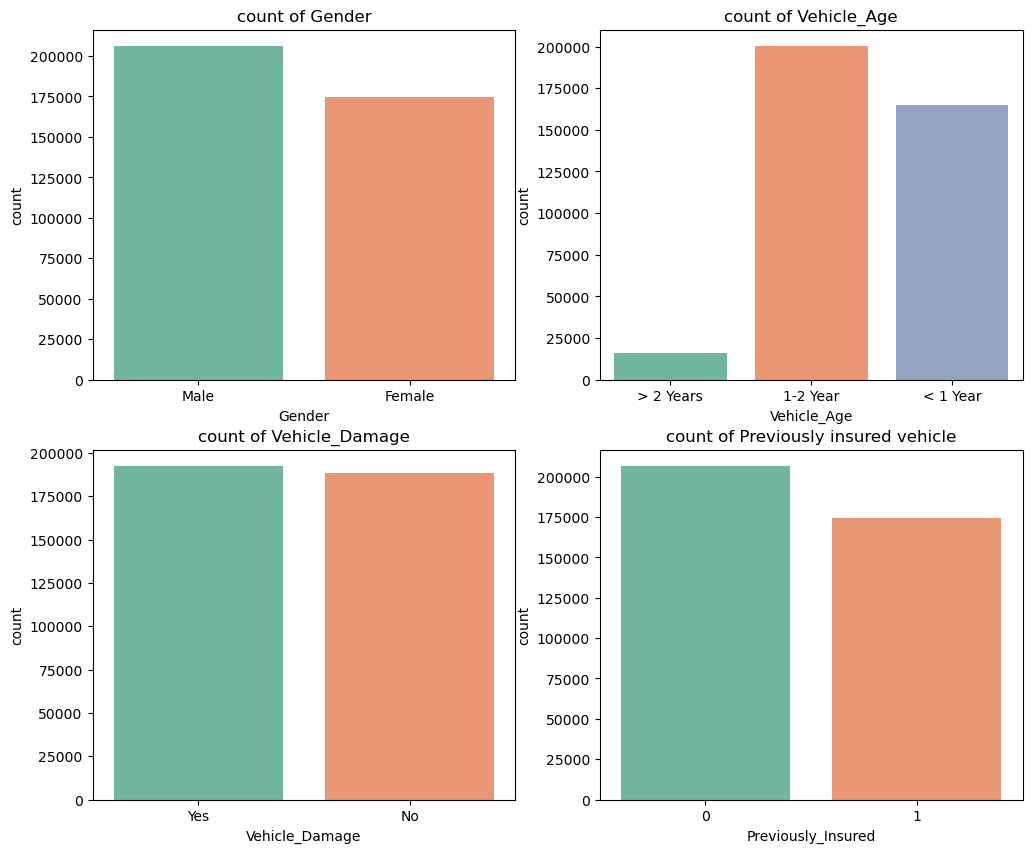

In [22]:
plt.figure(figsize=(12,10)) #univariate analysis of categoriacl columns
plt.subplot(221)
sns.countplot(x = 'Gender', data = data,hue = 'Gender', palette = 'Set2', legend=False)
plt.title('count of Gender')
plt.subplot(222)
sns.countplot(x = 'Vehicle_Age', data = data,hue = 'Vehicle_Age', palette = 'Set2', legend=False)
plt.title('count of Vehicle_Age')
plt.subplot(223)
sns.countplot(x = 'Vehicle_Damage', data = data, hue='Vehicle_Damage', palette = 'Set2', legend=False)
plt.title('count of Vehicle_Damage')
plt.subplot(224)
sns.countplot(x = 'Previously_Insured', data = data, hue='Previously_Insured', palette = 'Set2', legend=False)
plt.title('count of Previously insured vehicle')
plt.show()

In [23]:
data['Driving_License'].value_counts()

Driving_License
1    380106
0       812
Name: count, dtype: int64

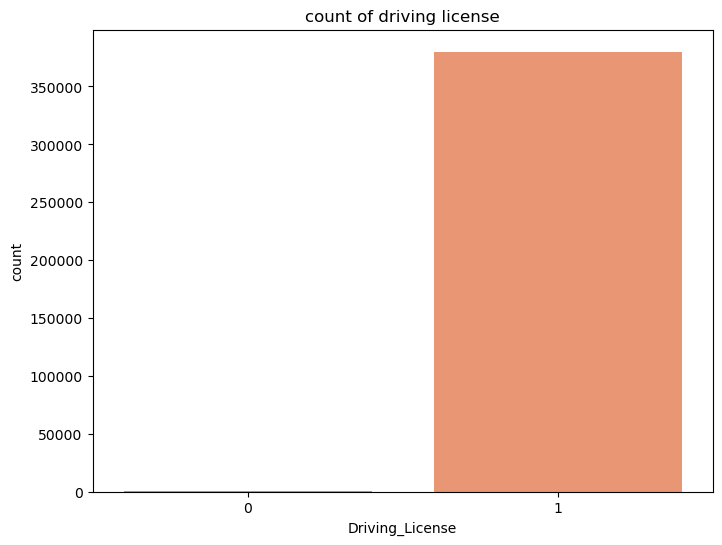

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Driving_License', data = data, hue='Driving_License', palette = 'Set2', legend=False)
plt.title('count of driving license')
plt.show()

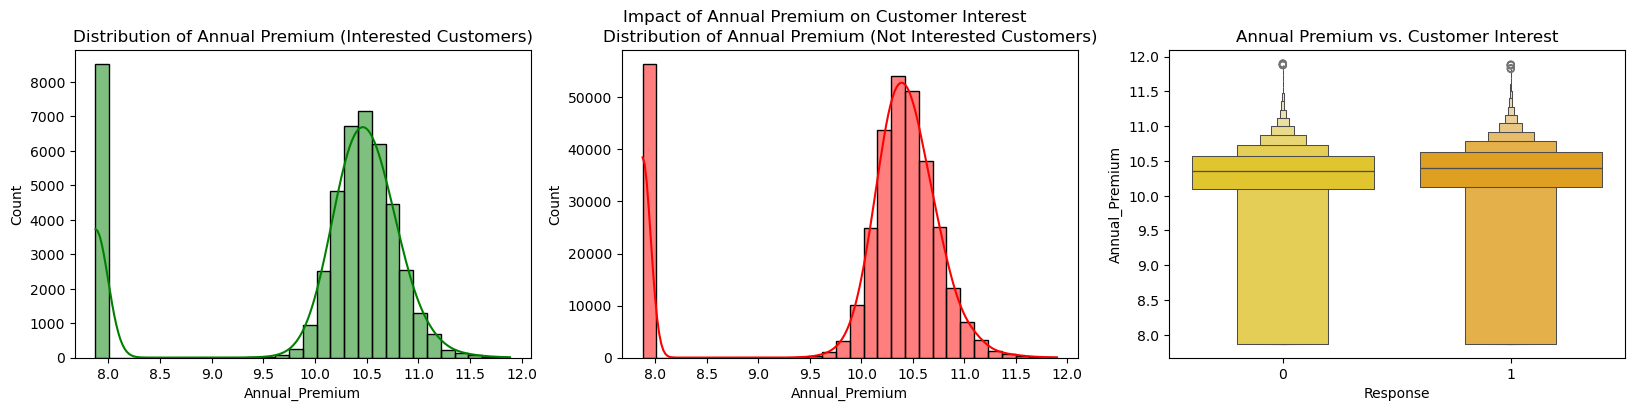

In [25]:

plt.rcParams['figure.figsize'] = (20, 4)

plt.subplot(131)
sns.histplot(data[data['Response'] == 1]['Annual_Premium'], color='green', kde=True, bins=30)
plt.title("Distribution of Annual Premium (Interested Customers)")

plt.subplot(132)
sns.histplot(data[data['Response'] == 0]['Annual_Premium'], color='red', kde=True, bins=30)
plt.title("Distribution of Annual Premium (Not Interested Customers)")

plt.subplot(133)
sns.boxenplot(x=data['Response'], y=data['Annual_Premium'], palette='Wistia', legend=False)
plt.title("Annual Premium vs. Customer Interest")

plt.suptitle('Impact of Annual Premium on Customer Interest')
plt.show()


In [26]:
print("impact of gender on customer interst")
print(pd.crosstab(data['Response'], data['Gender']))
print()
print("impact of previously_insured on customer interst")
print(pd.crosstab(data['Response'], data['Previously_Insured']))
print()
print("impact of vehicle_age on customer interst")
print(pd.crosstab(data['Response'], data['Vehicle_Age']))
print()
print("impact of vehicle_damage on customer interst")
print(pd.crosstab(data['Response'], data['Vehicle_Damage']))
print()
print("impact of Driving_license on customer interest")
print(pd.crosstab(data['Response'], data['Driving_License']))
print()
      

impact of gender on customer interst
Gender    Female    Male
Response                
0         156746  177495
1          18176   28501

impact of previously_insured on customer interst
Previously_Insured       0       1
Response                          
0                   159842  174399
1                    46519     158

impact of vehicle_age on customer interst
Vehicle_Age  1-2 Year  < 1 Year  > 2 Years
Response                                  
0              165417    157527      11297
1               34780      7199       4698

impact of vehicle_damage on customer interst
Vehicle_Damage      No     Yes
Response                      
0               187632  146609
1                  982   45695

impact of Driving_license on customer interest
Driving_License    0       1
Response                    
0                771  333470
1                 41   46636



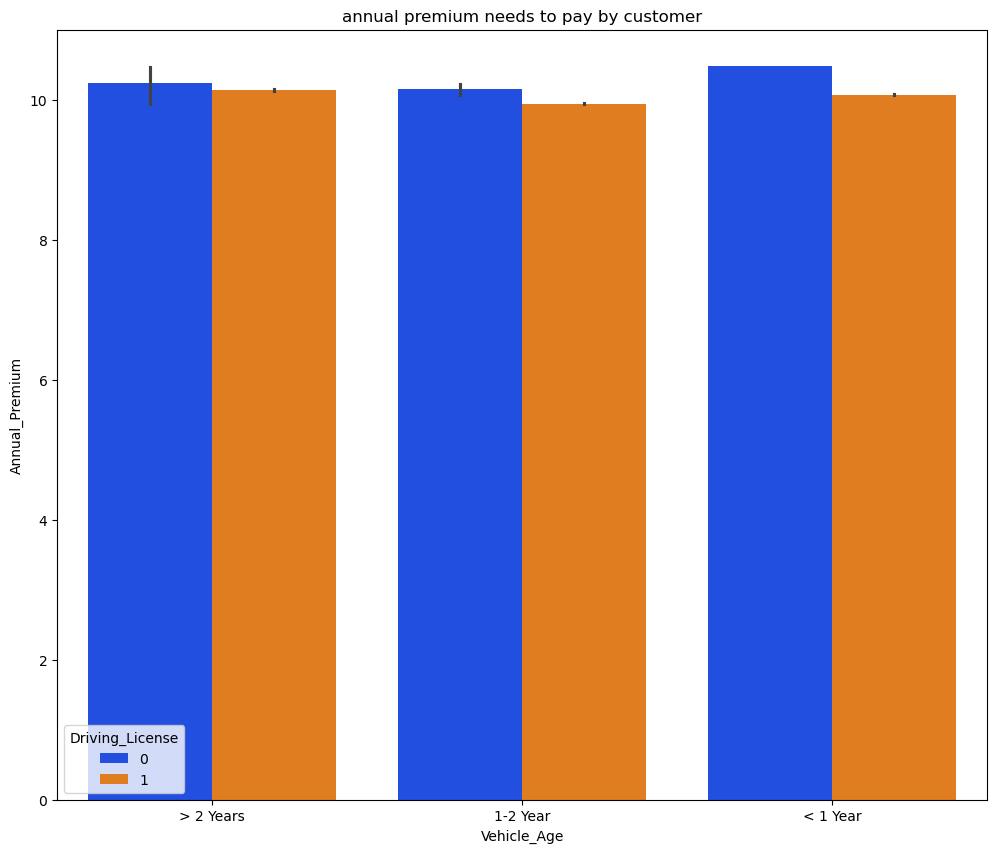

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(x = data['Vehicle_Age'], y = data['Annual_Premium'], hue=data['Driving_License'], palette = 'bright')
plt.title("annual premium needs to pay by customer")
plt.show()

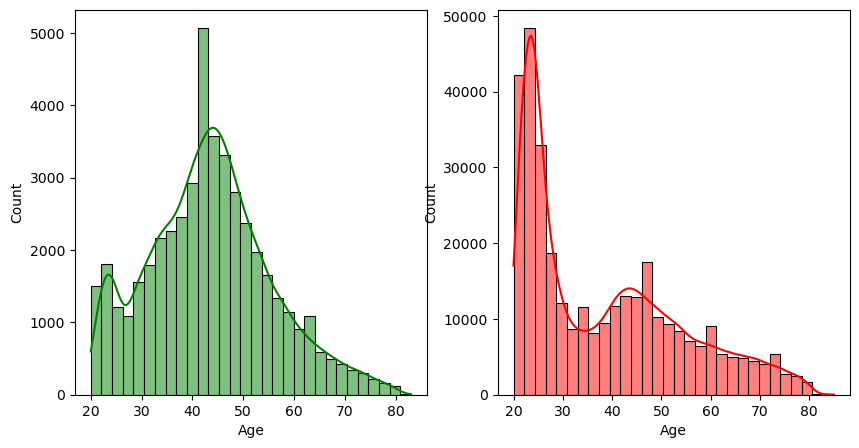

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data[data['Response'] == 1]['Age'], color='green', kde=True, bins=30)
plt.subplot(122)
sns.histplot(data[data['Response']==0]['Age'], color='red', kde=True, bins=30)
plt.show()

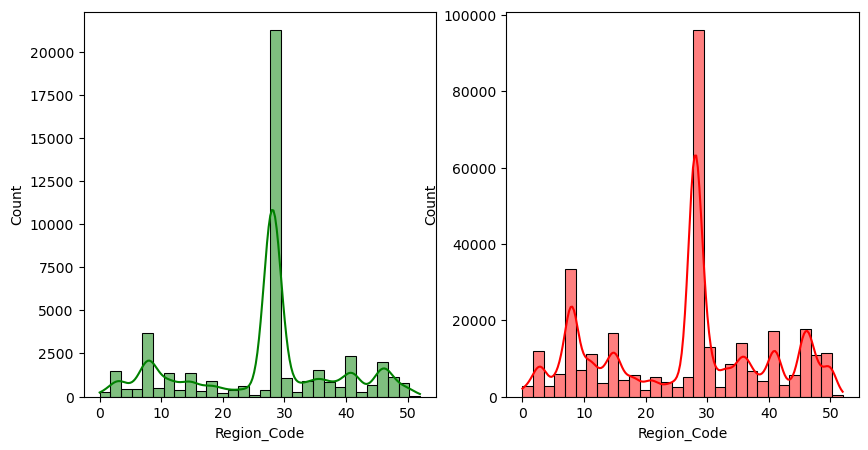

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data[data['Response'] == 1]['Region_Code'], color='green', kde=True, bins=30)
plt.subplot(122)
sns.histplot(data[data['Response']==0]['Region_Code'], color='red', kde=True, bins=30)
plt.show()

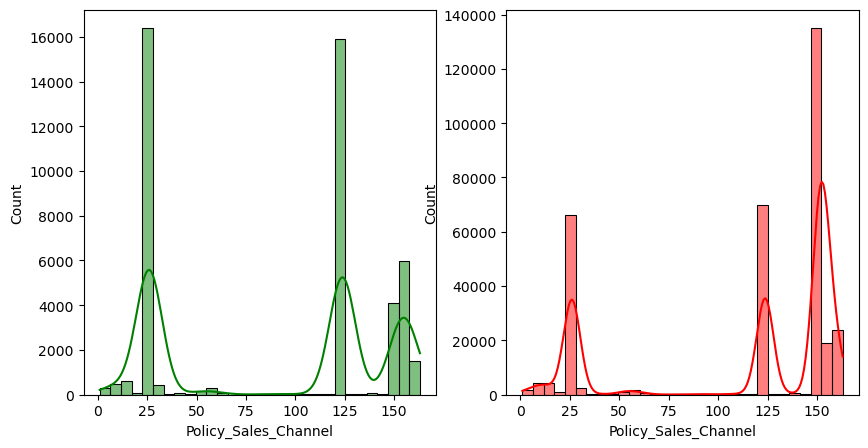

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data[data['Response'] == 1]['Policy_Sales_Channel'], color='green', kde=True, bins=30)
plt.subplot(122)
sns.histplot(data[data['Response']==0]['Policy_Sales_Channel'], color='red', kde=True, bins=30)
plt.show()

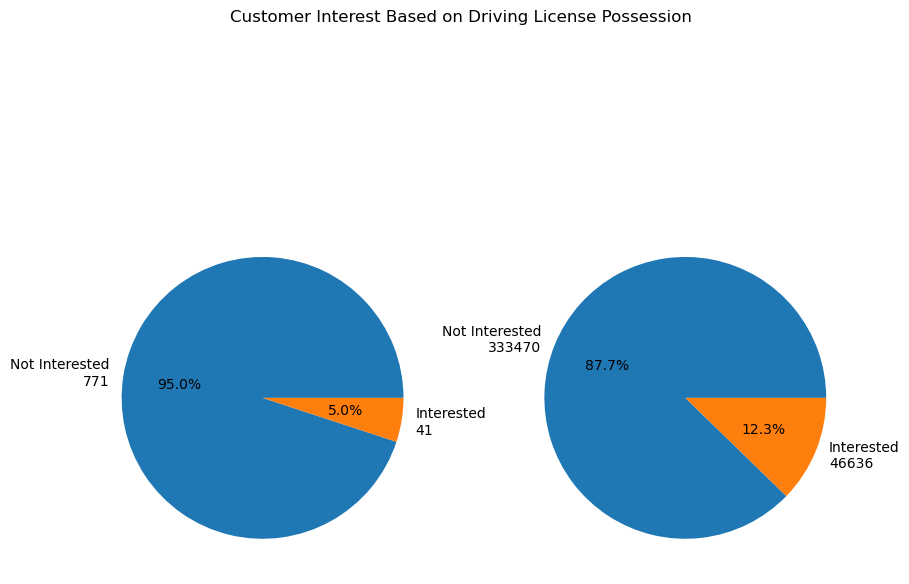

In [31]:


plt.figure(figsize=(10, 8))

# First Pie Chart - Driving_License == 0
plt.subplot(121)
plt.pie(data[data['Driving_License'] == 0]['Response'].value_counts(), 
        labels=[f'Not Interested\n{len(data[(data["Driving_License"] == 0) & (data["Response"] == 0)])}', 
                f'Interested\n{len(data[(data["Driving_License"] == 0) & (data["Response"] == 1)])}'], 
        autopct='%1.1f%%')

# Second Pie Chart - Driving_License == 1
plt.subplot(122)
plt.pie(data[data['Driving_License'] == 1]['Response'].value_counts(), 
        labels=[f'Not Interested\n{len(data[(data["Driving_License"] == 1) & (data["Response"] == 0)])}', 
                f'Interested\n{len(data[(data["Driving_License"] == 1) & (data["Response"] == 1)])}'], 
        autopct='%1.1f%%')

plt.suptitle("Customer Interest Based on Driving License Possession")
plt.show()


data preprocessing

In [81]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,10.607921,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,10.420375,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,10.553049,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,10.261826,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,10.221796,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,10.314603,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,10.597035,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,10.466469,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,10.705870,124.0,74,0


In [82]:
data.drop(['id','Driving_License'], axis = 1, inplace = True)

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
data['Gender'] = le.fit_transform(data['Gender'])
data['Vehicle_Age'] = le.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = le.fit_transform(data['Vehicle_Damage'])

In [96]:
data

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,2,1,10.607921,26.0,217,1
1,1,76,3.0,0,0,0,10.420375,26.0,183,0
2,1,47,28.0,0,2,1,10.553049,26.0,27,1
3,1,21,11.0,1,1,0,10.261826,152.0,203,0
4,0,29,41.0,1,1,0,10.221796,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,26.0,1,0,0,10.314603,26.0,88,0
381105,1,30,37.0,1,1,0,10.597035,152.0,131,0
381106,1,21,30.0,1,1,0,10.466469,160.0,161,0
381107,0,68,14.0,0,2,1,10.705870,124.0,74,0


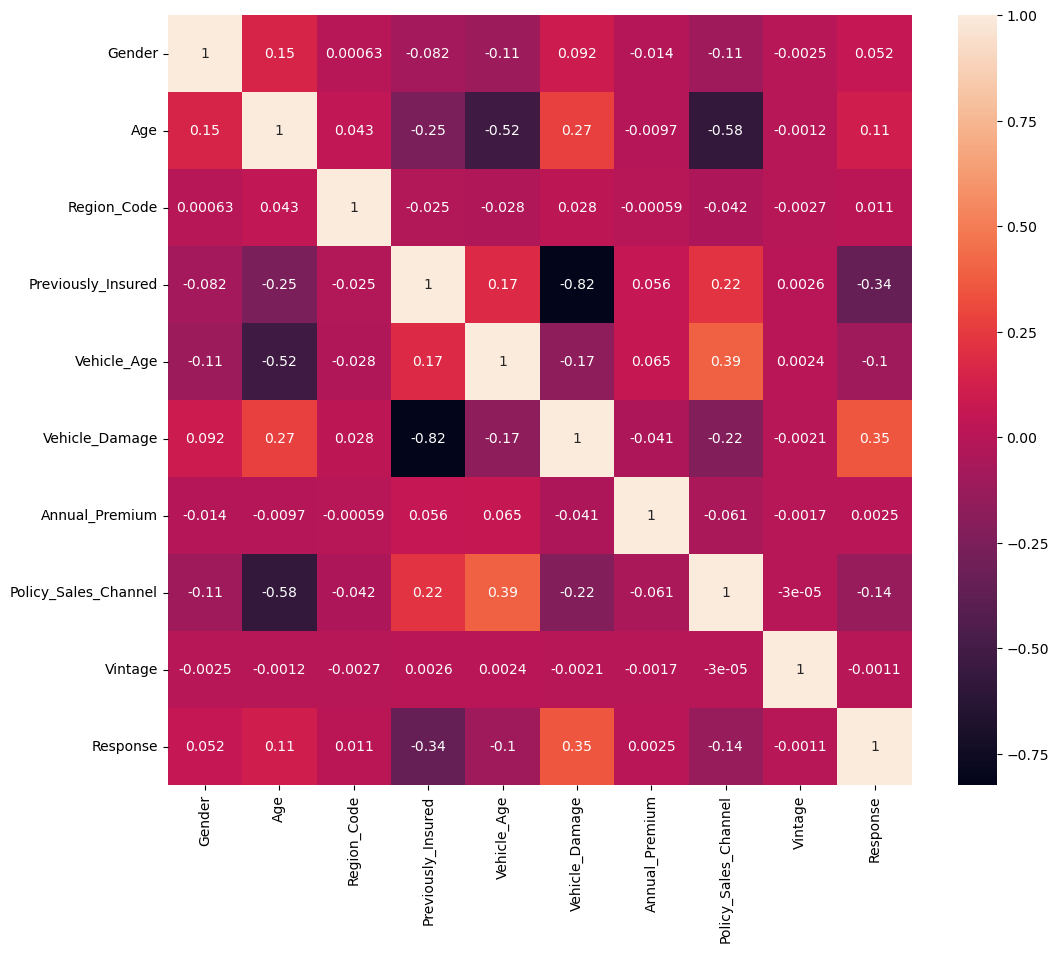

In [97]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [98]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [101]:
y.value_counts()

Response
0    334241
1     46677
Name: count, dtype: int64

In [104]:
from imblearn.combine import SMOTETomek
x_resample, y_resample = SMOTETomek().fit_resample(x,y)

In [105]:
y_resample.value_counts()

Response
1    328644
0    328644
Name: count, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42)

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [111]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=10)

In [109]:
models = {
    "KNN": (KNeighborsClassifier(), {
        "model__n_neighbors": np.arange(3, 15)
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        "model__max_depth": np.arange(5, 21),
        "model__criterion": ["gini", "entropy"]
    }),
    "Naïve Bayes": (GaussianNB(), {}),  # No hyperparameters to tune for GaussianNB
    "Random Forest": (RandomForestClassifier(), {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [10, 20, 30],
        "model__criterion": ["gini", "entropy"]
    }),
    "Logistic Regression": (LogisticRegression(max_iter=500), {
        "model__C": np.logspace(-4, 4, 10),
        "model__solver": ["liblinear", "lbfgs"]
    }),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": np.arange(3, 10),
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2]
    })
}

In [113]:
for name, (model, params) in models.items():
    print(f"Training {name}....................................................................................")

    pipeline = Pipeline([
        ('feature_selection', feature_selection),  # Select important features
        ('model', model)
    ])
    
    if params:  # Apply hyperparameter tuning if there are parameters
        search = RandomizedSearchCV(pipeline, param_distributions=params, 
                                    n_iter=10, cv=5, scoring='accuracy', 
                                    n_jobs=-1, random_state=42)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:  # Directly fit model if no hyperparameters (like Naïve Bayes)
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    # Predictions
    y_pred = best_model.predict(X_test)

    # Print results
    if params:
        print(f"Best parameters for {name}: {search.best_params_}")
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 80)

Training KNN....................................................................................
Best parameters for KNN: {'model__n_neighbors': 4}
Accuracy for KNN: 0.8685
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     65526
           1       0.82      0.94      0.88     65932

    accuracy                           0.87    131458
   macro avg       0.88      0.87      0.87    131458
weighted avg       0.88      0.87      0.87    131458

--------------------------------------------------------------------------------
Training Decision Tree....................................................................................
Best parameters for Decision Tree: {'model__max_depth': 20, 'model__criterion': 'gini'}
Accuracy for Decision Tree: 0.8454
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     65526
           1       0.81      0.91      0.86     65932

    accuracy             